# あまりに暑いので，140年分の気温をProphetで分析した
https://qiita.com/haltaro/items/9c68f0914677bb3a629c

In [4]:
import numpy as np # 数値計算
import pandas as pd # DataFrame
import matplotlib.pyplot as plt # グラフ描画
import seaborn as sns # グラフ描画設定
from tqdm import tqdm # forループの進捗状況確認
import codecs # Shift-JIS読み込み用
from fbprophet import Prophet # prophet

sns.set_style(style='ticks') # グラフスタイルの指定

In [6]:
years = [
    1872,
    1880,
    1890,
    1900,
    1910,
    1920,
    1930,
    1940,
    1950,
    1960,
    1970,
    1980,
    1990,
    2000,
    2010
]
read_path = 'data/raw/'

all_data = pd.DataFrame()

for year in tqdm(years):
    data_file = 'data_{}.csv'.format(year)

    # 補足1：普通にpd.read_csvすると読み込めない
    with codecs.open(read_path+data_file, "r",  "Shift-JIS", "ignore") as f:
        # 補足2：先頭数行のデータは使用しない．
        # また，不要なカラムは除外して利用する．
        data = pd.read_table(f, delimiter=",", skiprows=5, index_col=0, usecols=[0, 1, 4, 7])

    # datetime形式に変換
    data.index = pd.to_datetime(data.index)
    # カラム名を変更
    data.columns = ['average', 'high', 'low']

    # all_dataを更新
    all_data = pd.concat([all_data, data])

# 補足3：すべてNanの行は削除
all_data = all_data.dropna(how='all')

100%|██████████| 15/15 [00:00<00:00, 28.83it/s]


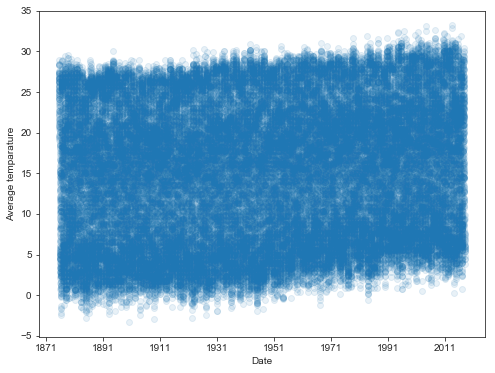

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(all_data.index, all_data.average, 'o', alpha=.1)
plt.xlabel('Date')
plt.ylabel('Average temparature')
plt.show()

In [ ]:
ave_data = pd.DataFrame()
ave_data['ds'] = all_data.index
ave_data['y'] = all_data.average.values

# Prophetモデルの構築
m = Prophet(weekly_seasonality=False, daily_seasonality=True)

# 学習
m.fit(ave_data)

# 将来30日間を予測
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast.head()

Text(67.625,0.5,'Average')

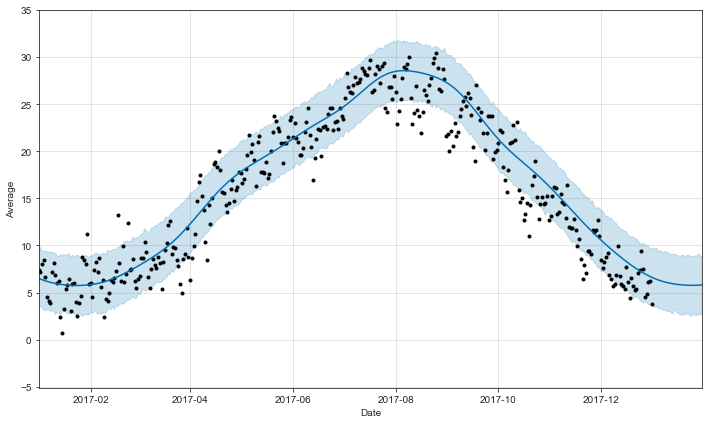

In [11]:
m.plot(forecast)
plt.xlim(future.ds.iloc[-365-30], future.ds.iloc[-1])
plt.xlabel('Date')
plt.ylabel('Average')

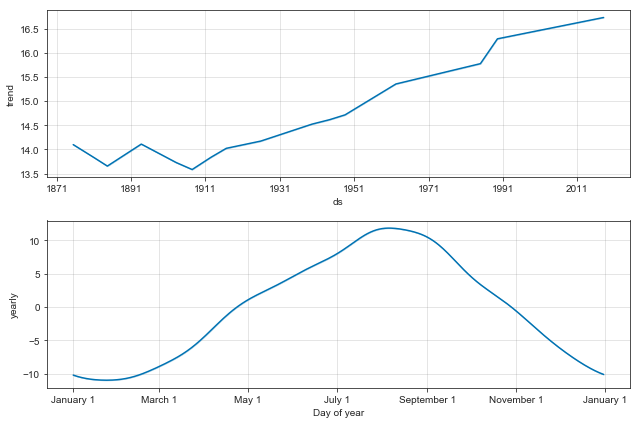

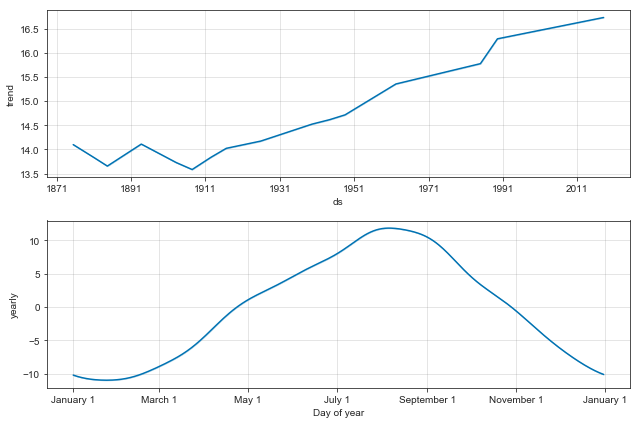

In [12]:
m.plot_components(forecast)